# Pandas tutorial

Following pandas tutorial from:
https://pandas.pydata.org/pandas-docs/stable/10min.html

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/Users/fj13/anaconda/envs/python-data/lib/python3.4/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Let's create a series which is like a 1D array.

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Pandas is smart so can deal with dates using Python's inbuilt datetime functionality. The default frequency is day, e.g. ```periods=6``` means 6 days. Let's create random data in categories A, B, C, and D corresponding to those dates.

In [7]:
dates = pd.date_range('20130101', periods=6)
dates
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.559266,-0.612039,-0.735584,0.118659
2013-01-02,-0.093784,0.464083,1.556954,-1.025934
2013-01-03,0.331655,-1.059310,1.493334,-0.938544
2013-01-04,-0.312934,1.556525,0.522707,-1.399952
2013-01-05,-0.220878,-1.058157,0.763265,1.855556
2013-01-06,-0.079438,-1.283399,0.794989,-2.462259


Above we created data by passing a multi-dimensional numpy array and specifying the column labels. Alternatively we can specify columns and corresponding values using a dictionary where the key is the column name and the value the data. If only one value is given it is repeated for the maximum length of the table. The values can be lists of strings, dates or numbers. A type can be specified explicitly.

In [14]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

We can use pandas to give us the indices, which default to integers from 0 unless specified, column names, or just the values.

In [17]:
df.index
df.columns
df.values

array([[-0.55926562, -0.61203898, -0.73558378,  0.11865922],
       [-0.09378381,  0.46408273,  1.55695445, -1.02593397],
       [ 0.33165523, -1.05930969,  1.49333415, -0.93854419],
       [-0.31293414,  1.55652533,  0.52270693, -1.39995165],
       [-0.22087771, -1.05815702,  0.7632649 ,  1.85555554],
       [-0.07943827, -1.28339909,  0.79498949, -2.46225879]])

Pandas also has a handy way of giving as an overview of the stats of a data frame.

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.155774,-0.332049,0.732611,-0.642079
std,0.296311,1.117152,0.832193,1.479159
min,-0.559266,-1.283399,-0.735584,-2.462259
25%,-0.289920,-1.059022,0.582846,-1.306447
50%,-0.157331,-0.835098,0.779127,-0.982239
75%,-0.083025,0.195052,1.318748,-0.145642
max,0.331655,1.556525,1.556954,1.855556


Like with numpy arrays you can also transpose your data.

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.559266,-0.093784,0.331655,-0.312934,-0.220878,-0.079438
B,-0.612039,0.464083,-1.059310,1.556525,-1.058157,-1.283399
C,-0.735584,1.556954,1.493334,0.522707,0.763265,0.794989
D,0.118659,-1.025934,-0.938544,-1.399952,1.855556,-2.462259


You can sort an array by axis or by the values in a specific column.

In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.118659,-0.735584,-0.612039,-0.559266
2013-01-02,-1.025934,1.556954,0.464083,-0.093784
2013-01-03,-0.938544,1.493334,-1.059310,0.331655
2013-01-04,-1.399952,0.522707,1.556525,-0.312934
2013-01-05,1.855556,0.763265,-1.058157,-0.220878
2013-01-06,-2.462259,0.794989,-1.283399,-0.079438


In [23]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-0.079438,-1.283399,0.794989,-2.462259
2013-01-03,0.331655,-1.059310,1.493334,-0.938544
2013-01-05,-0.220878,-1.058157,0.763265,1.855556
2013-01-01,-0.559266,-0.612039,-0.735584,0.118659
2013-01-02,-0.093784,0.464083,1.556954,-1.025934
2013-01-04,-0.312934,1.556525,0.522707,-1.399952


## Indexing

Selection values can work similarly to numpy arrays using indexing, either by indices...
Here first three rows are selected:

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-0.559266,-0.612039,-0.735584,0.118659
2013-01-02,-0.093784,0.464083,1.556954,-1.025934
2013-01-03,0.331655,-1.059310,1.493334,-0.938544


...or using the index values themselves...

In [25]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.093784,0.464083,1.556954,-1.025934
2013-01-03,0.331655,-1.059310,1.493334,-0.938544
2013-01-04,-0.312934,1.556525,0.522707,-1.399952


... or by columns:

In [26]:
df['A']

2013-01-01   -0.559266
2013-01-02   -0.093784
2013-01-03    0.331655
2013-01-04   -0.312934
2013-01-05   -0.220878
2013-01-06   -0.079438
Freq: D, Name: A, dtype: float64

More computationally efficient ways of selecting data is using pandas inbuilt functions such as ```.loc```. The first argument specifies the index by *value*, the second the columns.

In [27]:
df.loc[dates[0]]

A   -0.559266
B   -0.612039
C   -0.735584
D    0.118659
Name: 2013-01-01 00:00:00, dtype: float64

In [28]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.559266,-0.612039
2013-01-02,-0.093784,0.464083
2013-01-03,0.331655,-1.059310
2013-01-04,-0.312934,1.556525
2013-01-05,-0.220878,-1.058157
2013-01-06,-0.079438,-1.283399


In [29]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.093784,0.464083
2013-01-03,0.331655,-1.059310
2013-01-04,-0.312934,1.556525


In [30]:
df.loc['20130102',['A','B']]

A   -0.093784
B    0.464083
Name: 2013-01-02 00:00:00, dtype: float64

If you want to get an accessible value:

In [35]:
df.loc[dates[0],'A']

-0.5592656243674019

Or equivalently

In [36]:
df.at[dates[0],'A']

-0.5592656243674019

We can also specify the index and column by *index* (integer) using ```.iloc```.

In [37]:
df.iloc[3]

A   -0.312934
B    1.556525
C    0.522707
D   -1.399952
Name: 2013-01-04 00:00:00, dtype: float64

In [40]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.312934,1.556525
2013-01-05,-0.220878,-1.058157


In [41]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.093784,1.556954
2013-01-03,0.331655,1.493334
2013-01-05,-0.220878,0.763265


For selecting specific rows or columns:

In [43]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.093784,0.464083,1.556954,-1.025934
2013-01-03,0.331655,-1.059310,1.493334,-0.938544


In [44]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.612039,-0.735584
2013-01-02,0.464083,1.556954
2013-01-03,-1.059310,1.493334
2013-01-04,1.556525,0.522707
2013-01-05,-1.058157,0.763265
2013-01-06,-1.283399,0.794989


To get access to the scalar value:

In [45]:
df.iloc[1,1]

0.46408273157128249

In [46]:
df.iat[1,1]

0.46408273157128249

### Bolean Indexing

Can do this by column...

In [47]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.331655,-1.05931,1.493334,-0.938544


Or by entire array which creats ```NaNs``` for values which do not conform.

In [48]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.118659
2013-01-02,NaN,0.464083,1.556954,NaN
2013-01-03,0.331655,NaN,1.493334,NaN
2013-01-04,NaN,1.556525,0.522707,NaN
2013-01-05,NaN,NaN,0.763265,1.855556
2013-01-06,NaN,NaN,0.794989,NaN


We can also use ```isin()``` to pick out values out of a list.

In [50]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.559266,-0.612039,-0.735584,0.118659,one
2013-01-02,-0.093784,0.464083,1.556954,-1.025934,one
2013-01-03,0.331655,-1.059310,1.493334,-0.938544,two
2013-01-04,-0.312934,1.556525,0.522707,-1.399952,three
2013-01-05,-0.220878,-1.058157,0.763265,1.855556,four
2013-01-06,-0.079438,-1.283399,0.794989,-2.462259,three


The ```isin()``` method creates a boolean mask.

In [52]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [53]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.331655,-1.059310,1.493334,-0.938544,two
2013-01-05,-0.220878,-1.058157,0.763265,1.855556,four


### Changing values in a DF

We can change values in a dataframe by picking out cells using the methods we used above, e.g. ```.at()```,```.iat()```, ```.loc()``` etc.

In [55]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [58]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.559266,-0.612039,-0.735584,0.118659,NaN
2013-01-02,-0.093784,0.464083,1.556954,-1.025934,1.0
2013-01-03,0.331655,-1.059310,1.493334,-0.938544,2.0
2013-01-04,-0.312934,1.556525,0.522707,-1.399952,3.0
2013-01-05,-0.220878,-1.058157,0.763265,1.855556,4.0
2013-01-06,-0.079438,-1.283399,0.794989,-2.462259,5.0


Using the label...

In [60]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.612039,-0.735584,0.118659,NaN
2013-01-02,-0.093784,0.464083,1.556954,-1.025934,1.0
2013-01-03,0.331655,-1.059310,1.493334,-0.938544,2.0
2013-01-04,-0.312934,1.556525,0.522707,-1.399952,3.0
2013-01-05,-0.220878,-1.058157,0.763265,1.855556,4.0
2013-01-06,-0.079438,-1.283399,0.794989,-2.462259,5.0


...or position (using integer index).

In [62]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.735584,0.118659,NaN
2013-01-02,-0.093784,0.464083,1.556954,-1.025934,1.0
2013-01-03,0.331655,-1.059310,1.493334,-0.938544,2.0
2013-01-04,-0.312934,1.556525,0.522707,-1.399952,3.0
2013-01-05,-0.220878,-1.058157,0.763265,1.855556,4.0
2013-01-06,-0.079438,-1.283399,0.794989,-2.462259,5.0


We can also assign an array to a column. The array needs to have the correct length.

In [67]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.735584,5,NaN
2013-01-02,-0.093784,0.464083,1.556954,5,1.0
2013-01-03,0.331655,-1.059310,1.493334,5,2.0
2013-01-04,-0.312934,1.556525,0.522707,5,3.0
2013-01-05,-0.220878,-1.058157,0.763265,5,4.0
2013-01-06,-0.079438,-1.283399,0.794989,5,5.0


We can alternatively use conditions.

In [69]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.735584,-5,NaN
2013-01-02,-0.093784,-0.464083,-1.556954,-5,-1.0
2013-01-03,-0.331655,-1.059310,-1.493334,-5,-2.0
2013-01-04,-0.312934,-1.556525,-0.522707,-5,-3.0
2013-01-05,-0.220878,-1.058157,-0.763265,-5,-4.0
2013-01-06,-0.079438,-1.283399,-0.794989,-5,-5.0


### Missing data

When we have missing data (e.g. ```NaNs``` = ```np.nan()```) we can decide how to deal with it. This depends on what the data means, and what we're planning on doing with the data.
Here we're adding a column to a dataframe which is by default empty.

In [71]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.735584,5,NaN,1.0
2013-01-02,-0.093784,0.464083,1.556954,5,1.0,1.0
2013-01-03,0.331655,-1.059310,1.493334,5,2.0,NaN
2013-01-04,-0.312934,1.556525,0.522707,5,3.0,NaN


We can remove any rows that contain missing data, which here leaves only one row.

In [72]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.093784,0.464083,1.556954,5,1.0,1.0


Or assign a certain value.

In [73]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.735584,5,5.0,1.0
2013-01-02,-0.093784,0.464083,1.556954,5,1.0,1.0
2013-01-03,0.331655,-1.059310,1.493334,5,2.0,5.0
2013-01-04,-0.312934,1.556525,0.522707,5,3.0,5.0


We can define a mask to see the missing data cells: (doesn't seem to work!)

In [79]:
pd.isna(df1)

AttributeError: 'module' object has no attribute 'isna'

### Operations

We've learnt how to access and create data, now let's get some insight into it.


```.mean()``` breaks down the results by column.

In [84]:
df.mean()

A   -0.062563
B   -0.230043
C    0.732611
D    5.000000
F    3.000000
dtype: float64

Though we can also specify a single column an access the scalar value:

In [85]:
df['A'].mean()

-0.062563115437721126

If we want to perform the operation on the other axis, i.e. the rows, we do:

In [86]:
df.mean(1)

2013-01-01    1.066104
2013-01-02    1.585451
2013-01-03    1.553136
2013-01-04    1.953260
2013-01-05    1.696846
2013-01-06    1.886430
Freq: D, dtype: float64

Standard mathematical operations are perform
ed through attributes, e.g.

  \+    ```.add()```

  \-    ```.sub()```

  \*    ```.mul()```

  /    ```.div()```

  %    ```.mod()```

  ^    ```.pow()```




In [88]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [89]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.668345,-2.059310,0.493334,4.0,1.0
2013-01-04,-3.312934,-1.443475,-2.477293,2.0,0.0
2013-01-05,-5.220878,-6.058157,-4.236735,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


```.apply()``` can be used to apply functions to an entire column.

In [91]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.735584,5,NaN
2013-01-02,-0.093784,0.464083,0.821371,10,1.0
2013-01-03,0.237871,-0.595227,2.314705,15,3.0
2013-01-04,-0.075063,0.961298,2.837412,20,6.0
2013-01-05,-0.295940,-0.096859,3.600677,25,10.0
2013-01-06,-0.375379,-1.380258,4.395666,30,15.0


We can use lambda functions, which again apply to the columns.

In [93]:
df.apply(lambda x: x.max() - x.min())

A    0.644589
B    2.839924
C    2.292538
D    0.000000
F    4.000000
dtype: float64

We can use ```.value_counts()``` to see how often each value appears. This is equivalent to histograms.

In [94]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    1
2    5
3    4
4    6
5    4
6    4
7    1
8    1
9    1
dtype: int64

In [95]:
s.value_counts()

4    4
1    4
6    1
5    1
dtype: int64

We can also apply standard python methods on strings.

In [98]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [99]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Combining DataFrames

We can combined frames using different methods.

First let's look at ```.concat()```

In [100]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.898758,0.958768,-0.201830,0.108466
1,0.305561,0.347536,-0.732030,-0.618683
2,-0.560611,-0.087530,-0.200414,0.681197
3,1.366938,0.668936,-0.132817,0.993841
4,-1.176797,-0.715434,0.069582,0.368428
5,0.101954,1.723944,1.406150,-1.405799
6,1.114163,0.854711,-0.139555,-0.195721
7,-0.892503,0.394385,-0.606414,0.573054
8,-0.864179,-0.455856,-0.541315,1.568964
9,-0.668640,0.302494,-1.057862,-0.521788


We clan split this by row and then recombine using ```.concat()```. This simply comines the rows into one dataframe.

In [101]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.898758  0.958768 -0.201830  0.108466
 1  0.305561  0.347536 -0.732030 -0.618683
 2 -0.560611 -0.087530 -0.200414  0.681197,
           0         1         2         3
 3  1.366938  0.668936 -0.132817  0.993841
 4 -1.176797 -0.715434  0.069582  0.368428
 5  0.101954  1.723944  1.406150 -1.405799
 6  1.114163  0.854711 -0.139555 -0.195721,
           0         1         2         3
 7 -0.892503  0.394385 -0.606414  0.573054
 8 -0.864179 -0.455856 -0.541315  1.568964
 9 -0.668640  0.302494 -1.057862 -0.521788]

In [102]:
pd.concat(pieces)

,0,1,2,3
0,1.898758,0.958768,-0.201830,0.108466
1,0.305561,0.347536,-0.732030,-0.618683
2,-0.560611,-0.087530,-0.200414,0.681197
3,1.366938,0.668936,-0.132817,0.993841
4,-1.176797,-0.715434,0.069582,0.368428
5,0.101954,1.723944,1.406150,-1.405799
6,1.114163,0.854711,-0.139555,-0.195721
7,-0.892503,0.394385,-0.606414,0.573054
8,-0.864179,-0.455856,-0.541315,1.568964
9,-0.668640,0.302494,-1.057862,-0.521788


Another option is merging. The behaviour depends on the structure of the data and might create additional rows.

In [103]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [104]:
right

,key,rval
0,foo,4
1,foo,5


As here the ```key``` is the same, when we merge on key it gives us all combinations.

In [105]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Alternatively we have:

In [111]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [112]:
right

,key,rval
0,foo,4
1,bar,5


In [113]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


Appending adds to the end of a DataFrame.

In [114]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.222890,2.094428,0.718931,-0.215294
1,-1.003522,-0.335827,-1.485418,-1.008214
2,0.120679,0.999029,1.496227,0.647975
3,1.496508,0.317567,0.288402,0.244191
4,-0.812813,-0.060876,-0.032683,0.739897
5,0.094185,0.589124,0.755214,-0.553910
6,0.616506,-1.699795,-0.352939,0.909827
7,0.107695,0.345273,-0.614087,-0.407022


In [115]:
s = df.iloc[3]
s

A    1.496508
B    0.317567
C    0.288402
D    0.244191
Name: 3, dtype: float64

In [117]:
df.append(s, ignore_index=True)   # if we don't ignore index then there will be repeated indices

,A,B,C,D
0,-0.222890,2.094428,0.718931,-0.215294
1,-1.003522,-0.335827,-1.485418,-1.008214
2,0.120679,0.999029,1.496227,0.647975
3,1.496508,0.317567,0.288402,0.244191
4,-0.812813,-0.060876,-0.032683,0.739897
5,0.094185,0.589124,0.755214,-0.553910
6,0.616506,-1.699795,-0.352939,0.909827
7,0.107695,0.345273,-0.614087,-0.407022
8,1.496508,0.317567,0.288402,0.244191


### Grouping

Grouping can be used for splitting data, applying operations to only some data or creating new data structures.

In [118]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.682291,-0.522393
1,bar,one,0.891848,0.820483
2,foo,two,-0.477276,-1.003211
3,bar,three,-0.739465,-0.811914
4,foo,two,1.085400,1.284100
5,bar,two,-1.516056,1.261412
6,foo,one,-2.554293,-1.478943
7,foo,three,0.129108,-0.367133


Group by picks out unique values in the specifiec column(s). Performing an operation is then done with respect to those unique values.

In [119]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.363672,1.269980
foo,-1.134769,-2.087582


If we group by more than one column we create a hierarchical index.

In [120]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.891848  0.820483
    three -0.739465 -0.811914
    two   -1.516056  1.261412
foo one   -1.872001 -2.001337
    three  0.129108 -0.367133
    two    0.608124  0.280888

### Reshaping

We can create dataframes with several indices.

In [123]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.352549  1.473138
      two     0.694350  1.502137
baz   one    -1.313178  0.796892
      two    -1.382884 -1.267405
foo   one    -0.451392  1.137191
      two    -2.402792  0.407055
qux   one    -1.225759  1.209412
      two     1.467908 -0.210606

In [124]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.352549  1.473138
      two     0.694350  1.502137
baz   one    -1.313178  0.796892
      two    -1.382884 -1.267405

```.stack()``` turns multiple columns into a single column with multiple rows. It essentially adds additional hierarchies.

In [125]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.352549
               B    1.473138
       two     A    0.694350
               B    1.502137
baz    one     A   -1.313178
               B    0.796892
       two     A   -1.382884
               B   -1.267405
dtype: float64

We can undo this using ```unstack()```. This automatically applies to the last level.

In [127]:
stacked.unstack()

A                   B          
second       one       two       one       two
first                                         
bar     0.352549  0.694350  1.473138  1.502137
baz    -1.313178 -1.382884  0.796892 -1.267405

In [128]:
stacked.unstack().unstack()

A                   B          
second       one       two       one       two
first                                         
bar     0.352549  0.694350  1.473138  1.502137
baz    -1.313178 -1.382884  0.796892 -1.267405

We can also specify which level we want to unstack, e.g.

In [129]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.352549  0.694350
      B  1.473138  1.502137
baz   A -1.313178 -1.382884
      B  0.796892 -1.267405

In [130]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.352549 -1.313178
       B  1.473138  0.796892
two    A  0.694350 -1.382884
       B  1.502137 -1.267405

There is a special feature to create **pivot tables**. We can specify *values*, *index* and *columns*. If a key-value combination does not exist we get ```NaN```.

In [131]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.289227,0.493760
1,one,B,foo,0.659082,-2.528015
2,two,C,foo,1.553786,-0.623488
3,three,A,bar,-0.364328,1.423681
4,one,B,bar,-0.633606,0.078445
5,one,C,bar,0.063945,-1.098778
6,two,A,foo,0.691509,0.964186
7,three,B,foo,1.173569,-0.150673
8,one,C,foo,-1.889354,-0.605889
9,one,A,bar,-0.470891,-0.216294


In [132]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.470891  1.289227
      B -0.633606  0.659082
      C  0.063945 -1.889354
three A -0.364328       NaN
      B       NaN  1.173569
      C  0.717166       NaN
two   A       NaN  0.691509
      B  0.233126       NaN
      C       NaN  1.553786

### Time series

Due to the inbuilt datetime functionality it is very easy to deal with time series and binning data according to different frequencies.

In [136]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')   # seconds frequency
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    25588
Freq: 5T, dtype: int64

You can also add time zones.

In [137]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.067027
2012-03-07    0.459509
2012-03-08    1.583008
2012-03-09   -1.388559
2012-03-10    0.414782
Freq: D, dtype: float64

In [139]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.067027
2012-03-07 00:00:00+00:00    0.459509
2012-03-08 00:00:00+00:00    1.583008
2012-03-09 00:00:00+00:00   -1.388559
2012-03-10 00:00:00+00:00    0.414782
Freq: D, dtype: float64

In [140]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.067027
2012-03-06 19:00:00-05:00    0.459509
2012-03-07 19:00:00-05:00    1.583008
2012-03-08 19:00:00-05:00   -1.388559
2012-03-09 19:00:00-05:00    0.414782
Freq: D, dtype: float64

We can also change how the time looks.

In [142]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')  # monthly
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.554130
2012-02-29    0.917825
2012-03-31    0.980197
2012-04-30   -0.316422
2012-05-31    0.870114
Freq: M, dtype: float64

By default the last day of the month is chosen. We can change it so that only the month is presented.

In [143]:
ps = ts.to_period()
ps

2012-01   -0.554130
2012-02    0.917825
2012-03    0.980197
2012-04   -0.316422
2012-05    0.870114
Freq: M, dtype: float64

If we then convert this back to a time stamp we will get the first day of the month.

In [144]:
ps.to_timestamp()

2012-01-01   -0.554130
2012-02-01    0.917825
2012-03-01    0.980197
2012-04-01   -0.316422
2012-05-01    0.870114
Freq: MS, dtype: float64

There are a lot of things we can do with the datetime functionality.

In [147]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')  # quaterly
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -0.417935
1990Q2   -0.276368
1990Q3   -0.648984
1990Q4    1.919349
1991Q1    1.922177
1991Q2    0.596921
1991Q3    0.681545
1991Q4   -0.441220
1992Q1   -0.467938
1992Q2    1.255112
1992Q3   -0.173058
1992Q4   -0.554904
1993Q1   -1.036365
1993Q2   -0.081541
1993Q3    1.584321
1993Q4    1.052366
1994Q1   -0.666818
1994Q2   -1.493126
1994Q3   -0.689240
1994Q4    0.217129
1995Q1    0.201699
1995Q2   -0.084713
1995Q3    1.439631
1995Q4    0.941571
1996Q1    0.160513
1996Q2    0.432905
1996Q3   -1.910158
1996Q4   -1.117598
1997Q1    1.638857
1997Q2    0.217213
1997Q3    0.843328
1997Q4    0.562413
1998Q1   -0.813299
1998Q2    1.074260
1998Q3   -0.561292
1998Q4    0.345571
1999Q1    0.237829
1999Q2   -1.547741
1999Q3    0.854254
1999Q4    0.876259
2000Q1   -1.732320
2000Q2    0.720668
2000Q3    1.221423
2000Q4    0.922372
Freq: Q-NOV, dtype: float64

In [148]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts

1990-03-01 09:00   -0.417935
1990-06-01 09:00   -0.276368
1990-09-01 09:00   -0.648984
1990-12-01 09:00    1.919349
1991-03-01 09:00    1.922177
1991-06-01 09:00    0.596921
1991-09-01 09:00    0.681545
1991-12-01 09:00   -0.441220
1992-03-01 09:00   -0.467938
1992-06-01 09:00    1.255112
1992-09-01 09:00   -0.173058
1992-12-01 09:00   -0.554904
1993-03-01 09:00   -1.036365
1993-06-01 09:00   -0.081541
1993-09-01 09:00    1.584321
1993-12-01 09:00    1.052366
1994-03-01 09:00   -0.666818
1994-06-01 09:00   -1.493126
1994-09-01 09:00   -0.689240
1994-12-01 09:00    0.217129
1995-03-01 09:00    0.201699
1995-06-01 09:00   -0.084713
1995-09-01 09:00    1.439631
1995-12-01 09:00    0.941571
1996-03-01 09:00    0.160513
1996-06-01 09:00    0.432905
1996-09-01 09:00   -1.910158
1996-12-01 09:00   -1.117598
1997-03-01 09:00    1.638857
1997-06-01 09:00    0.217213
1997-09-01 09:00    0.843328
1997-12-01 09:00    0.562413
1998-03-01 09:00   -0.813299
1998-06-01 09:00    1.074260
1998-09-01 09:

### Categoricals

Categories are not numerical data and can be renamed.

In [149]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [150]:
df["grade"] = df["raw_grade"].astype("category")
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [152]:
df["grade"].cat.categories = ["very good", "good", "very bad"]    # rename categories
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

We can also add categories that don't appear.

In [153]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

They are sorted by the order in the definition.

In [154]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [155]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

Plotting dataframes is easy and intuitive.

In [5]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.736751
2000-01-02    0.279000
2000-01-03    0.317496
2000-01-04   -1.070979
2000-01-05    0.950875
2000-01-06   -1.697290
2000-01-07   -0.422416
2000-01-08    0.112015
2000-01-09    0.122371
2000-01-10   -0.488264
2000-01-11    2.106597
2000-01-12    1.623951
2000-01-13    0.363562
2000-01-14    1.086973
2000-01-15   -0.402457
2000-01-16   -1.006525
2000-01-17    1.694376
2000-01-18   -1.387742
2000-01-19    0.199687
2000-01-20    1.473958
2000-01-21    0.724000
2000-01-22   -0.099808
2000-01-23    0.169167
2000-01-24   -0.495699
2000-01-25    1.485587
2000-01-26   -0.621646
2000-01-27   -0.710850
2000-01-28    0.376526
2000-01-29    0.858291
2000-01-30    0.101769
                ...   
2002-08-28   -0.461989
2002-08-29    0.308525
2002-08-30   -0.052793
2002-08-31    0.048015
2002-09-01   -0.235962
2002-09-02   -0.740384
2002-09-03   -1.998338
2002-09-04    0.489807
2002-09-05    0.614306
2002-09-06    1.228413
2002-09-07   -0.056150
2002-09-08   -0.803669
2002-09-09 

In [6]:
ts = ts.cumsum()
ts

2000-01-01    -0.736751
2000-01-02    -0.457751
2000-01-03    -0.140255
2000-01-04    -1.211233
2000-01-05    -0.260358
2000-01-06    -1.957648
2000-01-07    -2.380064
2000-01-08    -2.268050
2000-01-09    -2.145679
2000-01-10    -2.633944
2000-01-11    -0.527347
2000-01-12     1.096604
2000-01-13     1.460166
2000-01-14     2.547139
2000-01-15     2.144683
2000-01-16     1.138158
2000-01-17     2.832534
2000-01-18     1.444792
2000-01-19     1.644480
2000-01-20     3.118438
2000-01-21     3.842437
2000-01-22     3.742629
2000-01-23     3.911796
2000-01-24     3.416097
2000-01-25     4.901684
2000-01-26     4.280038
2000-01-27     3.569189
2000-01-28     3.945715
2000-01-29     4.804006
2000-01-30     4.905775
                ...    
2002-08-28   -77.588789
2002-08-29   -77.280264
2002-08-30   -77.333057
2002-08-31   -77.285042
2002-09-01   -77.521004
2002-09-02   -78.261388
2002-09-03   -80.259725
2002-09-04   -79.769919
2002-09-05   -79.155613
2002-09-06   -77.927200
2002-09-07   -77

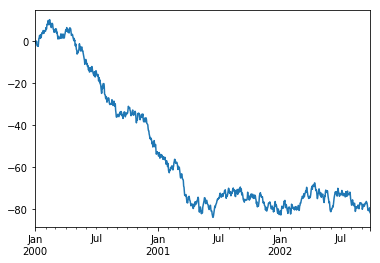

In [7]:
ts.plot()

In [8]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])

In [9]:
df = df.cumsum()

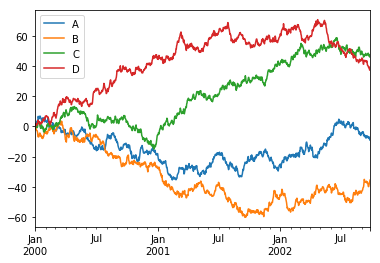

In [10]:
plt.figure(); df.plot(); plt.legend(loc='best')